<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 4</p></tp>
            <tp><p style="font-size:150%;text-align:center">Búsqueda en espacio de estados (3/3) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo <a class="anchor" id="inicio"></a>

En el notebook anterior solucionamos el problema de las jarras de agua con una función de costo que mide el desperdicio de agua usando el algoritmo `best_first_search`. En este notebook vamos a utilizar dicho algoritmo para hacer búsquedas basadas en costos (llamada `uniform_cost_search`). También adaptaremos dicho algoritmo para usar funciones heurísticas, cuyo propósito es mejorar el proceso de búsqueda. Las heurísticas usan información específica sobre el problema para evaluar qué tan cerca está un estado de la solución del problema. 

Adaptado de (Russell & Norvig, 2020), secciones 3.4.2, 3.5.1 y 3.5.2.

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Problema del viaje a Rumania](#rumania).
* [Estrategia de búsqueda uniform cost](#uniform).
* [Búsqueda avara](#avara).
* [Problema del 8 puzzle](#8puzzle).
* [Heurísticas para el 8 puzzle](#heuristicas).
* [Comparación de las heurísticas](#compara).


## El problema del viaje a Rumania <a class="anchor" id="rumania"></a>

([Volver al inicio](#inicio))

Imagine que usted viaja a Rumania y que desconoce por completo el país, pero tiene a mano un mapa de los caminos, que le indica las longitudes en kilómetros, como el siguiente:

<img src="./imagenes/Rumania.png" width="500px"/>

El problema consiste en, dada una ciudad de salida y una ciudad de llegada, encontrar el camino más corto.

**Ejercicio 1:**

Complete la definición formal del problema del viaje a Rumania:    

* **Estado inicial**: 

* **Posibles acciones**: 

* **Función de transiciones**: 

* **Prueba de satisfacción del objetivo**: 

* **Función de costo**: 

---

Podemos importar este problema desde nuestra librería `ambientes`:

In [1]:
from ambientes import ViajeRumania
from busqueda import *

Supongamos que nuestro problema es ir desde Sibiu hasta Bucharest. Entonces creamos el problema así:

In [2]:
viaje = ViajeRumania('Sibiu', 'Bucharest')

Observe que el problema tiene un atributo de rutas, que podemos visualizar así:

In [3]:
viaje.rutas

{'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Zerind': {'Arad': 75, 'Oradea': 71},
 'Arad': {'Timisoara': 118, 'Sibiu': 140, 'Zerind': 71},
 'Timisoara': {'Lugoj': 111, 'Arad': 118},
 'Lugoj': {'Mehadia': 70, 'Timisoara': 111},
 'Mehadia': {'Drobeta': 75, 'Lugoj': 70},
 'Drobeta': {'Craiova': 120, 'Mehadia': 75},
 'Sibiu': {'Fagaras': 99, 'Rimnicu Vilcea': 80, 'Arad': 140, 'Oradea': 151},
 'Rimnicu Vilcea': {'Craiova': 146, 'Pitesti': 97, 'Sibiu': 80},
 'Craiova': {'Pitesti': 138, 'Drobeta': 120, 'Rimnicu Vilcea': 146},
 'Fagaras': {'Bucharest': 211, 'Sibiu': 99},
 'Pitesti': {'Bucharest': 101, 'Craiova': 138, 'Rimnicu Vilcea': 97},
 'Bucharest': {'Giurgiu': 90, 'Urziceni': 85, 'Fagaras': 211, 'Pitesti': 101},
 'Giurgiu': {'Bucharest': 90},
 'Urziceni': {'Vaslui': 142, 'Hirsova': 98, 'Bucharest': 85},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Iasi': {'Neamt': 87, 'Vaslui': 92},
 'Neamt': {'Iasi': 87},
 'Hirsova': {'Eforie': 86, 'Urziceni': 98},
 'Eforie': {'Hirsova': 86}}

Este atributo se utiliza tanto para encontrar las acciones aplicables como para determinar los costos de ir de una ciudad a una ciudad vecina.

**Ejercicio 2:**

A mano, encuentre el camino más corto desde Sibiu a Bucharest. Cree una lista con los nodos en dicho camino y encuentre su atributo `costo_camino`.

---

In [4]:
n = Nodo(estado = viaje.estado_inicial, 
         madre = None, 
         accion = None, 
         costo_camino = 0,
         codigo = "origin")

n1 = nodo_hijo(problema = viaje,
               madre  = n, 
               accion = 'Rimnicu Vilcea')

n2 = nodo_hijo(problema = viaje,
               madre  = n1, 
               accion = 'Pitesti')

n3 = nodo_hijo(problema = viaje,
               madre  = n2, 
               accion = 'Bucharest')

print("Resultado del test objetivo: {}".format(viaje.test_objetivo(n3.estado)) )



Resultado del test objetivo: True


**Ejercicio 3:**

Desde la librería `busqueda` importe las funciones `depth_first_search` y `breadth_first_search`. Utilice ambos métodos para solucionar el problema y encuentre el kilometraje de la solución dada por cada uno de estos métodos. ¿Alguna se parece a la solución encontrada a mano?

---

In [5]:
ans = depth_first_search(viaje)

print("Resultado del test objetivo: {}".format(viaje.test_objetivo( ans.estado)) )
print("Costo del camino de depth first {}".format(ans.costo_camino))

Resultado del test objetivo: True
Costo del camino de depth first 1135


In [6]:
ans = breadth_first_search(viaje)

print("Costo del camino de breath first {}".format(ans.costo_camino))
print("Resultado del test objetivo: {}".format(viaje.test_objetivo( ans.estado)) )


Costo del camino de breath first 310
Resultado del test objetivo: True


## Uniform-cost search (o algoritmo de Dijkstra) <a class="anchor" id="uniform"></a>

([Volver al inicio](#inicio))

En el notebook anterior solucionamos el problema de las jarras de agua con una función de costo que mide el desperdicio de agua. Al realizar una búsqueda en un espacio de estados usando una función de costo, como `desperdicio`, se dice que se está realizando una búsqueda de costo uniforme. Lo que caracteriza a la búsqueda de costo uniforme es que la función de costo siempre crece a medida que aumentamos la longitud del camino. 

**Ejercicio 4:**

Ahora encuentre la solución óptima del viaje a Rumania mediante el algoritmo de costo uniforme (que es el mismo `best_first_search`).

---

In [7]:
ans = best_first_search(viaje)

print("Costo del camino de best first {}".format(ans.costo_camino))
print("Resultado del test objetivo: {}".format(viaje.test_objetivo( ans.estado)) )

Costo del camino de best first 278
Resultado del test objetivo: True


**Cuando el orden de los factores sí altera el producto**

Veremos ahora un ejemplo que nos permite justificar por qué la verificación de la prueba de satisfacción de objetivo se realiza al explorar la frontera, no al expandir un nodo. Observe que en el notebook 2 realizábamos esta verificación al expandir un nodo. Si encontrábamos una solución, estaba bien y concluíamos la búsqueda. En el algoritmo `best_first_search` somos un poco más cuidadosos y no verificamos sino hasta expandir la frontera de acuerdo a la lista prioritaria. La razón de esto podemos verla con un ejemplo.

Consideremos el problema de ir desde Sibiu a Bucharest.

<img src="./imagenes/Sibiu2Bucharest.png" width="280px"/>

Los sucesores de Sibiu son Rimnicu Vilcea y Fagaras, con un coste de 80 y 99, respectivamente. El nodo de menor costo, Rimnicu Vilcea, se amplía a continuación, añadiendo Pitesti con un costo de 80+97=177. El nodo de menor costo es ahora Fagaras, por lo que se amplía, añadiendo Bucarest con un costo de 99 + 211 = 310. Bucarest es el objetivo, pero el algoritmo sólo comprueba los objetivos cuando expande un nodo, no cuando genera un nodo, por lo que aún no ha detectado que éste es un camino hacia el objetivo.

El algoritmo continúa, eligiendo Pitesti para la siguiente expansión y añadiendo un segundo camino a Bucarest con un costo de 80 + 97 + 101 = 278. Tiene un costo menor, por lo que sustituye a la ruta anterior alcanzada y se añade a la frontera. Resulta que este nodo tiene ahora el costo más bajo, por lo que se considera el siguiente, se comprueba que es una meta y se devuelve. Nótese que si hubiéramos comprobado la existencia de un objetivo al generar un nodo en lugar de al ampliar el nodo de menor costo, habríamos devuelto un camino de mayor costo (el que pasa por Fagaras).



## Búsqueda avara <a class="anchor" id="avara"></a>

([Volver al inicio](#inicio))

Hasta el momento hemos usado una función de costo para ordenar los nodos en la frontera. Esto nos permite explorar primero el nodo cuyo `costo_camino` sea óptimo hasta el momento. No obstante, también podemos ordenar los nodos usando un criterio distinto, llamado una *función heurística*.

La idea de una heurística es usar información del problema específico que se desea resolver, de tal manera que, para cada estado $s$, se pueda obtener un *costo estimado* (o una *distancia*) para llegar desde $s$ a un estado objetivo dado.

Ilustremos este concepto mediante el ambiente del Laberinto. Observe que cada estado es una posición $(x,y)$ del agente en la cuadrícula y que la salida se encuentra en $(0,0)$. Una estimación del costo de llegar a la salida desde el estado $(x,y)$ puede ser la distancia euclidiana entre estado y salida.

<img src="./imagenes/laberinto.png" width="280px"/>

<AxesSubplot:>

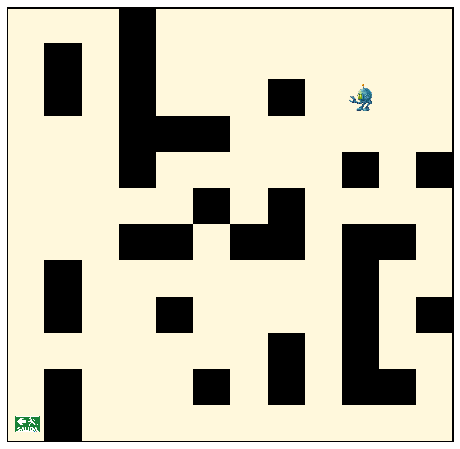

In [8]:
from busqueda import *
from ambientes import Laberinto

inicia = (9,9)
lab = Laberinto(inicia)
s = lab.estado_inicial
lab.pintar_estado(s)

**Ejercicio 5:**

Implemente la función de distancia en el laberinto.

In [9]:
import numpy as np

def distancia(casilla):
    
    return (casilla[0]**2) + (casilla[1]**2)


---

El siguiente es el pseudocódigo del algoritmo `greedy_search`:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> greedy_search(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">f</font>) <font style="font-weight: bold;" color = "red">returns</font> <font style="font-style: italic;">nodo</font> o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">s</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">v</font> &#8592; <font style="font-style: italic;">f</font>(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista prioritaria con 1 item con key <font style="font-style: italic;">nodo</font> y valor <font style="font-style: italic;">v</font><br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br> 
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">hijo</font> <font style="font-weight: bold;" color = "red">in</font> EXPAND(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">s</font> &#8592; <font style="font-style: italic;">hijo</font>.estado<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">v</font> &#8592; <font style="font-style: italic;">f</font>(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">frontera</font>[<font style="font-style: italic;">hijo</font>] &#8592; <font style="font-style: italic;">v</font> <br>
    &nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>




**Ejercicio 6:**

Implemente el pseudocódigo de la función `greedy_search` y utilícela para resolver el problema del laberinto.

In [10]:
def greedy_search(problema, f):
    
    
    # INCLUYA AQUÍ SU CÓDIGO
    state = problema.estado_inicial
    node  = Nodo(estado = state, 
                 madre  = None, 
                 accion = None,
                 costo_camino = 0, 
                 codigo = "orgin")
    cost = f(state)
    
    frontier = ListaPrioritaria()
    frontier.push(node, cost)
    
    code = problema.codigo(state)
    explored = [code]
    
    while not frontier.is_empty():
        node = frontier.pop()

        if problema.test_objetivo(node.estado):
            return node
        
        for child in expand(problema, node):
            state = child.estado
            code  = problema.codigo(state)
            
            if code not in explored:
                cost  = f(state)
                frontier.push(child, cost)
                explored.append(code)
    
    return None
    
    # AQUÍ TERMINA SU CÓDIGO

In [11]:
ans =  greedy_search(lab, distancia)

print("Costo del camino de greedy search {}".format(ans.costo_camino))
print("Resultado del test objetivo: {}".format( lab.test_objetivo( ans.estado)) )

Costo del camino de greedy search 18
Resultado del test objetivo: True


**Ejercicio 7:**

Use la función `compara_funciones` en el archivo `tiempos` para comparar los tiempos de CPU de los métodos `greedy_search` y `best_first_search` con la función de costo uniforme. ¿Cuál algoritmo es mejor?

In [12]:
from tiempos import *

In [13]:
def costo_uniforme(self, estado=None, accion = None):
    return 1

In [14]:
inicia = (9,9)
lab = Laberinto(inicia)
nombres = ['best_first_search', 'greedy']

funs = [lambda x: greedy_search(x,  costo_uniforme),
        lambda x: best_first_search(x,  costo_uniforme)]

              sum_sq    df           F        PR(>F)
C(Función)  0.000031   1.0  129.341612  1.309989e-19
Residual    0.000023  98.0         NaN           NaN


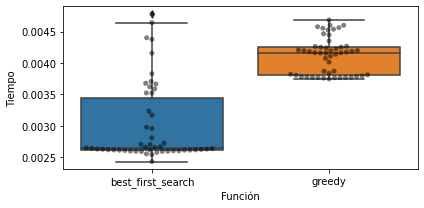

In [15]:
data = compara_funciones(funs=funs,
                         arg=lab,
                         nombres=nombres, 
                         N = 50)

# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.boxplot(data=data, x='Función', y='Tiempo')
sns.swarmplot(data=data, x='Función', y='Tiempo', color='black', alpha = 0.5, ax=ax);

# Anova diferencia de medias
model = ols('Tiempo ~ C(Función)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

---

## El problema del rompecabezas de 8 piezas <a class="anchor" id="8puzzle"></a>

([Volver al inicio](#inicio))

Considere ocho piezas cuadradas, cada una con un número del 1 al 8. Estas piezas se ponen en una caja cuadrada  formando un rompecabezas, de tal manera que queda un espacio del mismo tamaño que las piezas, como en la figura siguiente:

<img src="./imagenes/puzzle.png" width="350px"/>

Las piezas adyacentes al espacio pueden desplazarse desde su posición hasta ocupar el espacio vacío, de tal manera que es posible cambiar el orden de todas las piezas. El problema consiste en, dada una posición del rompecabezas, encontrar una manera de mover las piezas para lograr otra posición deseada.

La descripción formal del problema es como sigue:

* **Estado inicial**: Un rompezabezas donde las piezas están dispuestas aleatoriamente.

* **Posibles acciones**: Mover una ficha al espacio vacío. En cada configuración hay maximo cuatro fichas que pueden moverse al espacio vacío (cuando este está en el centro). Usualmente solo pueden moverse tres fichas o solo dos, cuando el espacio vacío está en una esquina. 

* **Función de transiciones**: Mover la ficha y obtener el tablero correspondiente.

* **Prueba de satisfacción del objetivo**: El tablero está organizado como sigue:

<img src="./imagenes/objetivo.png" width="350px"/>

* **Función de costo**: Cada acción cuesta 1 punto.

Observe que podemos usar el método `pintar_camino` para visualizar el movimiento correspondiente de las piezas:

In [16]:
from ambientes import Rompecabezas
from random import choice
import numpy as np

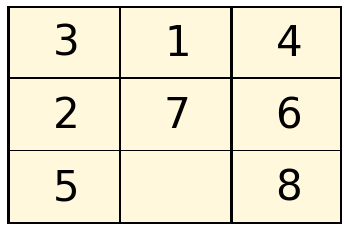

In [17]:
puz = Rompecabezas()
s = puz.estado_inicial
a = choice(puz.acciones_aplicables(s))
puz.pintar_camino([a])

El problema del rompecabezas es difícil, y usualmente le cuesta un buen tiempo a los métodos de `breadth_first_search` y `depth_first_search` converger en una solución. Si usted es curioso, trate de usar uno de estos métodos para resolver el problema. El resultado que usted debe obtener es una celda que se queda corriendo hasta que se agota la paciencia.

El método `uniform_cost_search`, que usa la función de costos usual en el algoritmo `best_first_search`, es mucho más eficiente que los anteriores, pero aún puede mejorarse, como lo veremos en un momento. Por ahora, el ejercicio es resolver el problema del rompecabezas mediante `best_first_search` y la siguiente función de costo:

In [18]:
def costo_accion(self, estado, accion):
    return 1

<AxesSubplot:>

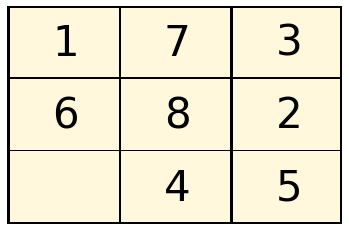

In [19]:
puz = Rompecabezas()
S = np.matrix([[0, 6, 1], [4, 8, 7], [5, 2, 3]])
puz.estado_inicial = S
puz.pintar_estado(puz.estado_inicial)

In [20]:
%%time
l = best_first_search(puz)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
    print("La cantidad de movimientos es: ", len(camino))
else:
    print("No hay solución!")

La solución encontrada es:  [((0, 1), (0, 0)), ((1, 1), (0, 1)), ((2, 1), (1, 1)), ((2, 0), (2, 1)), ((1, 0), (2, 0)), ((1, 1), (1, 0)), ((2, 1), (1, 1)), ((2, 2), (2, 1)), ((1, 2), (2, 2)), ((0, 2), (1, 2)), ((0, 1), (0, 2)), ((0, 0), (0, 1)), ((1, 0), (0, 0)), ((2, 0), (1, 0)), ((2, 1), (2, 0)), ((1, 1), (2, 1)), ((0, 1), (1, 1)), ((0, 0), (0, 1)), ((1, 0), (0, 0)), ((2, 0), (1, 0))]
La cantidad de movimientos es:  20
CPU times: user 1min 17s, sys: 971 ms, total: 1min 17s
Wall time: 35min 4s


Observe que, en mi computador, el algoritmo con costo uniforme tarda cerca de medio minuto en converger a una solución.

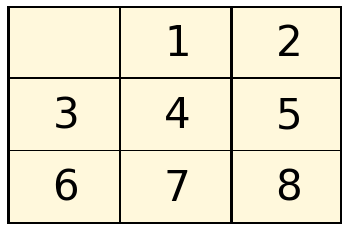

In [21]:
puz.pintar_camino(camino)

## Heurísticas para el 8 puzzle <a class="anchor" id="heuristicas"></a>

([Volver al inicio](#inicio))

Las heurísticas son reglas de comportamiento que aprovechan el conocimiento específico sobre ciertos problemas. El problema del rompecabezas nos permite explicar esto mejor. Podemos evaluar una especie de distancia entre un estado dado y el estado objetivo mediante el conteo de piezas que no se encuentran en el lugar objetivo. Por ejemplo, considere el siguiente tablero:

<AxesSubplot:>

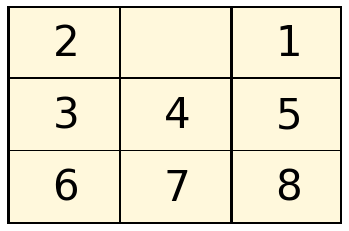

In [22]:
puz = Rompecabezas()
puz.objetivo = puz.estado_inicial
S = np.matrix([[6, 3, 2], [7, 4, 0], [8, 5, 1]])
puz.objetivo = S
puz.pintar_estado(S)

En este tablero hay dos piezas que no están en la posición objetivo, a saber, el 1 y el 2. Por lo tanto, la función heurística `piezas_mal_puestas` debe devolver el valor 2.

<AxesSubplot:>

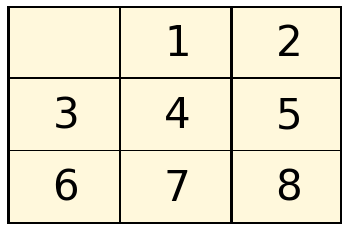

In [23]:
puz.pintar_estado(np.matrix([[6,7,8], [3,4,5], [0,1,2]]).T)

**Ejercicio 6:**

Implemente la función `piezas_mal_puestas`.

Escriba y verifique su código con la siguiente celda:

In [24]:
def piezas_mal_puestas(estado, objetivo=np.matrix([[6,7,8], [3,4,5], [0,1,2]]).T):
    
    # AQUÍ INICIA SU CODIGO
    offset = not np.sum( (estado == 0) * (objetivo == 0) ) 

    return np.sum(estado != objetivo) - offset
    # AQUÍ TERMINA SU CÓDIGO

In [25]:
piezas_mal_puestas(S) 

2

Número de piezas mal puestas: 2


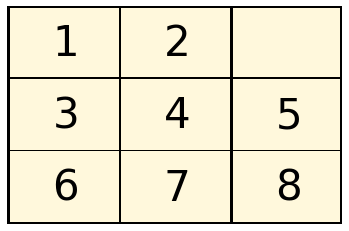

In [26]:

    
puz = Rompecabezas()
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[1]
s = puz.transicion(objetivo, a)
a = puz.acciones_aplicables(s)[1]
s = puz.transicion(s, a)
puz.pintar_estado(s)
print('Número de piezas mal puestas:', piezas_mal_puestas(s))

El output de la celda debe ser el valor 2.

---

Otra heurística para el problema del rompecabezas es el siguiente. La distancia entre un estado y el objetivo se mide como la suma de las distancias entre cada pieza y su lugar objetivo. Esta última distancia se mide como la distancia del taxista, es decir, la suma de las distancias verticales y horizontales. Por ejemplo, suponga el siguiente estado:

<AxesSubplot:>

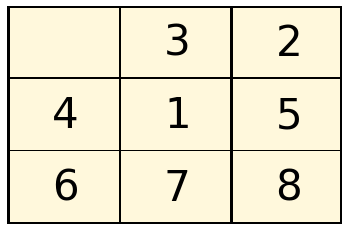

In [27]:
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[0]
s = puz.transicion(objetivo, a)
a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)
a = puz.acciones_aplicables(s)[1]
s = puz.transicion(s, a)
a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)
puz.pintar_estado(s)

Observe que el 1 está a una casilla de su lugar (una abajo), el cuatro está a una casilla de su lugar (una a la izquierda) y el 3 está a dos casillas de su lugar (una arriba y una a la izquierda. El valor de la heurística `manhattan` debe ser 1 + 1 + 2 = 4. 

**Ejercicio 7:**

Implemente la función `manhattan`.

Escriba y verifique su código con la siguiente celda:

In [28]:
def manhattan(estado: np.matrix, objetivo=np.matrix([[6,7,8], [3,4,5], [0,1,2]]).T):
    
    # busco cuales son los numeros que no están donde 
    # deberían estar
    a = np.array(estado[estado != objetivo]).flatten()
    
    if len(a) == 0:
        return 0
    
    # obtengo los indices (x, y) donde el estado no coincide con 
    # el estado objetivo
    x, y = np.where(estado != objetivo)
    
    # para cada numero que no está donde debería, miro cuales son 
    # los indices (x, y) donde se ubica y los guarda en el los vectores
    # "i, j"
    i, j = np.vectorize(lambda x: np.where(objetivo == x))(a.flatten())
    
    # resta entrada a entrada el vector "x" con "i", toma su valor absuluto y lo suma
    # hace lo mismo para "y" con "j". Uso flatten porque np tiene fetiche con envolver en 
    # una matriz aunque sea solo una fila

    return np.sum( np.abs(x-i) + np.sum(np.abs(y-j)) )
 

In [29]:
def manhattan_no_vectorial(estado, objetivo=np.matrix([[6,7,8], [3,4,5], [0,1,2]]).T):
    
    x, y = np.where(estado != objetivo)
    counter = 0
    
    for i in range(len(x)):
        j, k = np.where( objetivo == estado[x[i], y[i]] )
        counter += abs(j - x[i]) + abs(k - y[i])
    
    return counter


In [30]:
manhattan(S)

4

Distancia Manhattan: 8


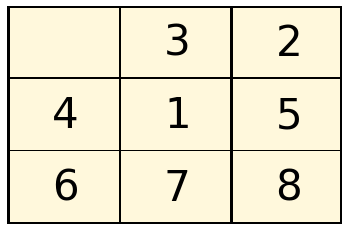

In [31]:

puz = Rompecabezas()
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[0]
s = puz.transicion(objetivo, a)

a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)

a = puz.acciones_aplicables(s)[1]
s = puz.transicion(s, a)

a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)

puz.pintar_estado(s)
print('Distancia Manhattan:', manhattan(s))


El output de la celda debe ser el valor 4.

---

## Comparando heurísticas <a class="anchor" id="compara"></a>

([Volver al inicio](#inicio))

Al ordenar los nodos explorados mediante una función heurística, lo que se busca es explorar primero aquel nodo que se acerque más al objetivo. Hemos definido dos maneras de estimar esta idea y es hora de compararlas mediante el tiempo de CPU.

**Ejercicio 8:**

Compare el tiempo de CPU de las dos heurísticas en el algoritmo `greedy_search`. ¿Cuál mejora más el tiempo de búsqueda?

In [32]:
funs = [lambda x: greedy_search(x,  manhattan),
        lambda x: greedy_search(x,  piezas_mal_puestas)]

nombres = ['manhattan', 'piezas_mal_puestas']

/home/dave/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dave/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


              sum_sq     df           F        PR(>F)
C(Función)  1.991934    1.0  1324.76915  1.180492e-89
Residual    0.297714  198.0         NaN           NaN


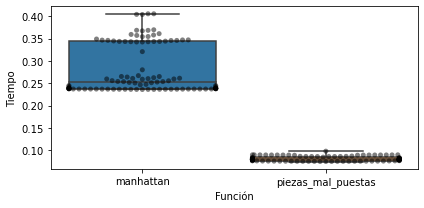

In [33]:
data = compara_funciones(funs = funs,
                         arg  = puz,
                         nombres = nombres, 
                         N = 100)

# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.boxplot(data=data, x='Función', y='Tiempo')
sns.swarmplot(data=data, x='Función', y='Tiempo', color='black', alpha = 0.5, ax=ax);

# Anova diferencia de medias
model = ols('Tiempo ~ C(Función)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

**Nota:**

La heurística `manhattan` es mejor porque estima más precisamente qué tan diferente es un estado del objetivo. Por ejemplo, si el 1 esta a tres fichas de distancia, `manhattan` devuelve el valor 3, mientras que si está a dos fichas de distancia, devuelve 2. En ambos casos `piezas_mal_puestas` devuelve el valor 1, sin importar que se necesiten más movimientos en la primera que en la segunda para poner el 1 en su lugar.

Esto no significa que la heurística `manhattan` sea mejor en tiempo de CPU. La razón es que la evaluación de esta puede ser más demorada en cada estado que la de la otra heurística.

---

## En este notebook usted aprendió

([Volver al inicio](#inicio))

* Cómo realizar una búsqueda mediante el método *uniform_cost* (o *Dijkstra).
* Cómo realizar una búsqueda mediante el método *greedy*.
* Implementar y comparar distintas heurísticas para resolver el problema del rompecabezas.
* Comparar los tiempos y la optimalidad de las heurísticas.


---